In [7]:
# Load the dataset with specified encoding
file_path = '/content/Liver Patient Dataset (LPD)_train.csv'

In [8]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import export_graphviz
import graphviz
from math import sqrt

In [9]:
# Load the dataset
data = pd.read_csv('/content/Liver Patient Dataset (LPD)_train.csv', encoding='latin1')
data2 = pd.read_csv('/content/Liver Patient Dataset (LPD)_train.csv', encoding='latin1')  # For Comparing
data.head(10)


,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
5,46.0,Male,1.8,0.7,208.0,19.0,14.0,7.6,4.4,1.30,1
6,26.0,Female,0.9,0.2,154.0,NaN,12.0,7.0,3.5,1.00,1
7,29.0,Female,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10,1
8,17.0,Male,0.9,0.3,202.0,22.0,19.0,7.4,4.1,1.20,2
9,55.0,Male,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.00,1


In [10]:
print(data.shape)

(30691, 11)


In [11]:
print(data.isnull().sum())  #sum null val

Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
 Alkphos Alkaline Phosphotase           796
 Sgpt Alamine Aminotransferase          538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
 ALB Albumin                            494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64


In [12]:
data.isnull() #checking null values

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
30686,False,False,False,False,False,False,False,False,False,False,False
30687,False,False,False,False,False,False,False,False,False,False,False
30688,False,False,False,False,False,False,False,False,False,False,False
30689,False,False,False,False,False,False,False,False,False,False,False


In [13]:
# Calculate the percentage of missing values for each column
null_percentages = data.isnull().mean() * 100

# Identify columns with more than 50% null values
columns_to_drop_due_to_nulls = null_percentages[null_percentages > 50].index.tolist()

# Dropping columns with more than 50% null values and irrelevant columns
data.drop(columns=columns_to_drop_due_to_nulls, axis=1, inplace=True)

columns_to_drop_due_to_nulls, data.shape


([], (30691, 11))

In [14]:
print(data.isnull().sum())

Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
 Alkphos Alkaline Phosphotase           796
 Sgpt Alamine Aminotransferase          538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
 ALB Albumin                            494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64


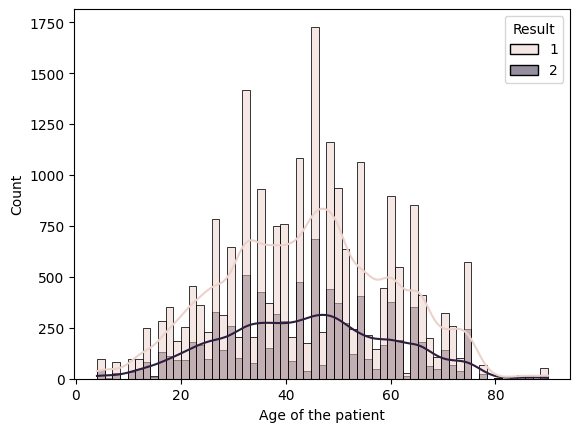

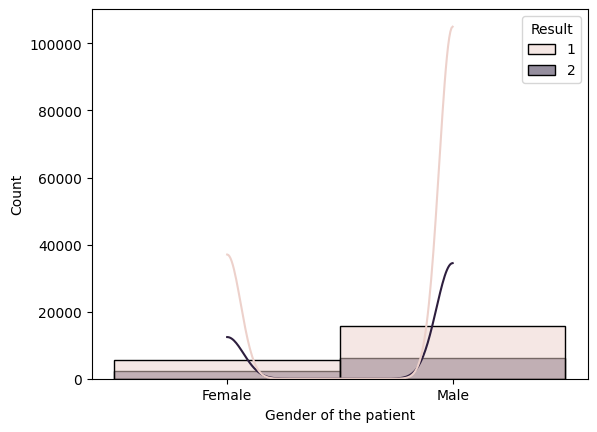

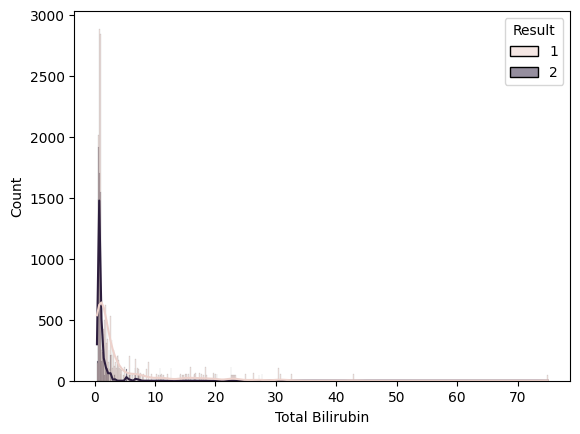

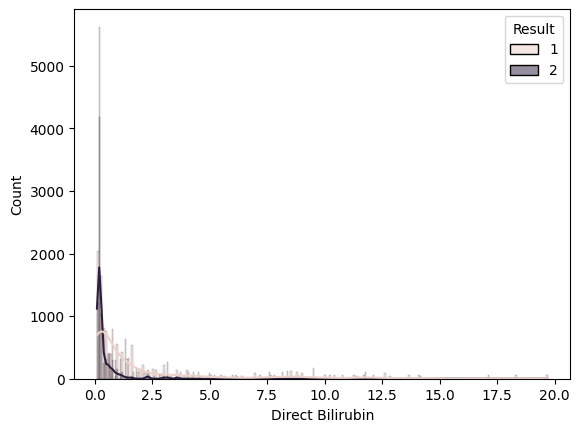

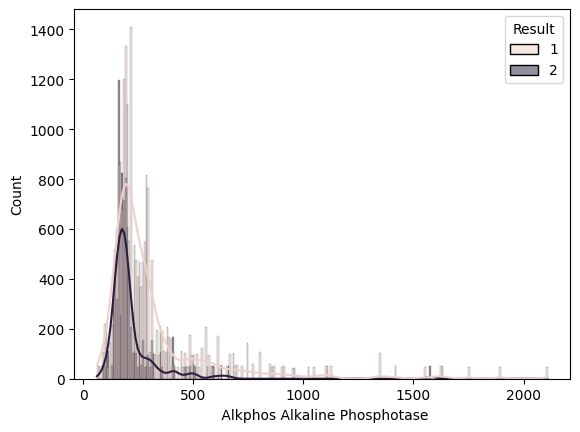

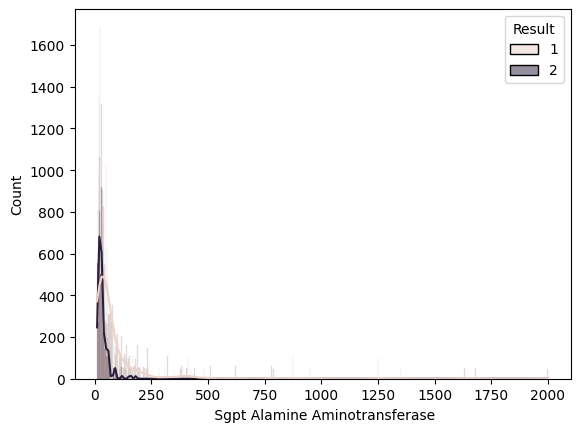

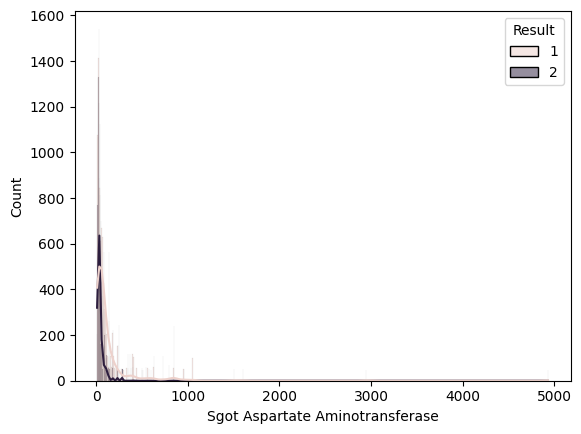

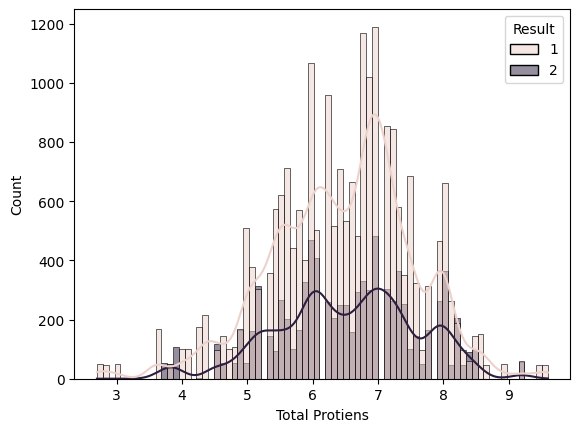

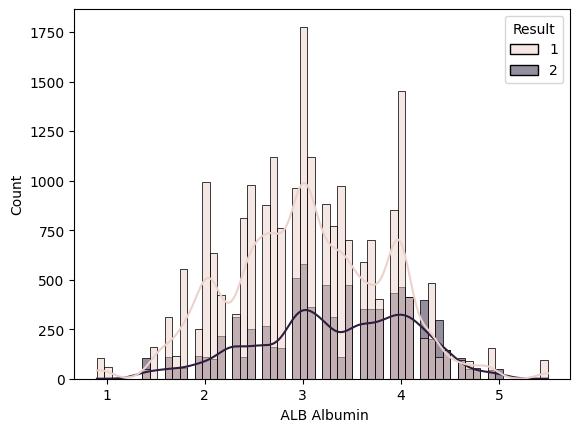

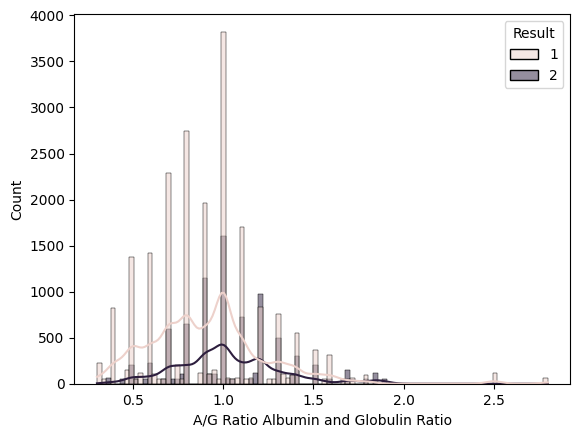

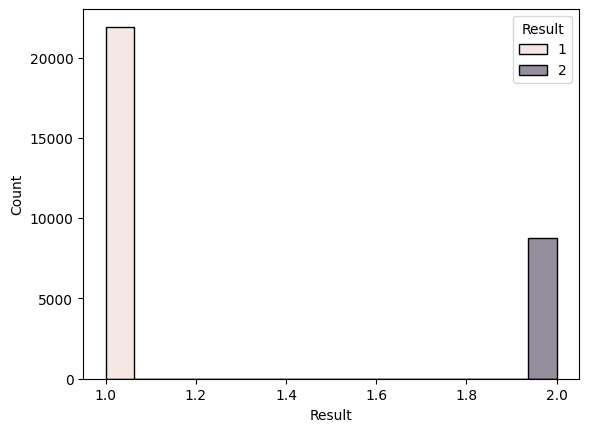

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in data.columns:
    plt.figure()
    sns.histplot(data=data, x=col, hue="Result", kde=True)
    plt.show()

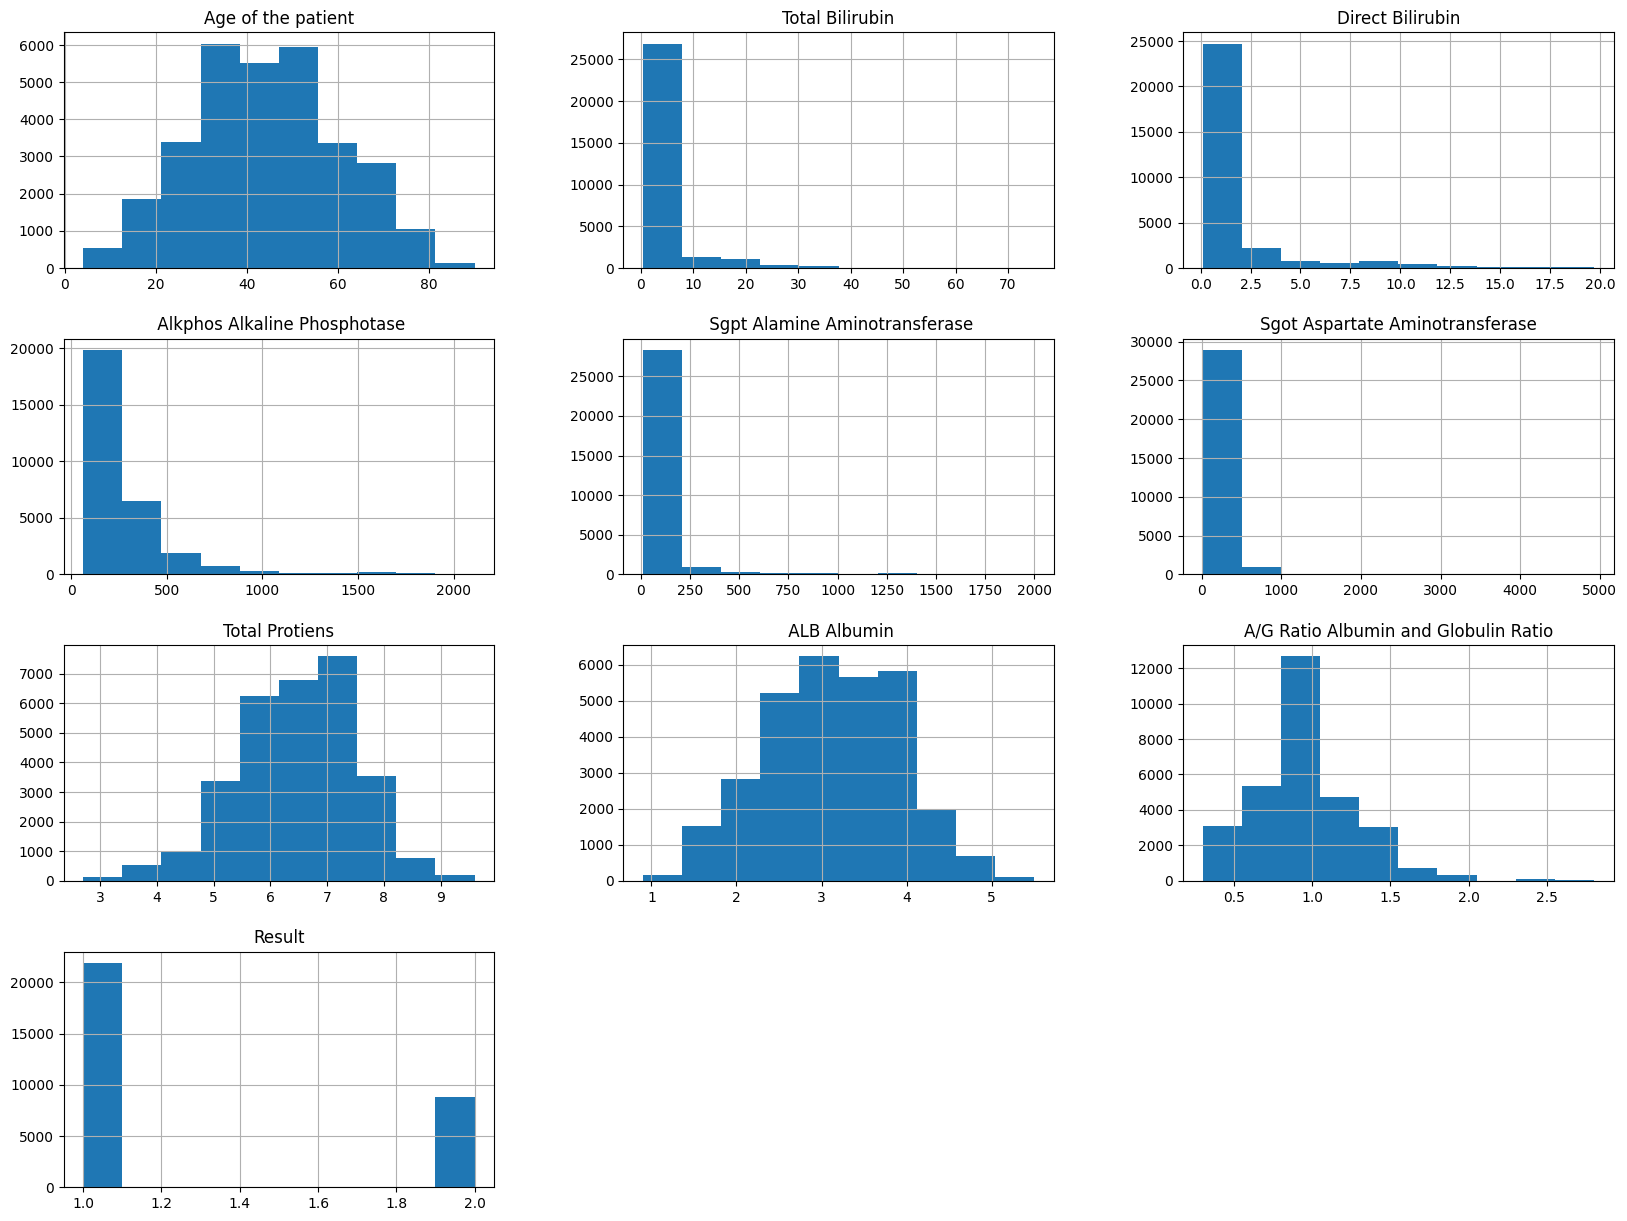

In [16]:
# Plotting histograms for the dataset
%matplotlib inline
data.hist(bins=10, figsize=(20, 15))
plt.show()


In [17]:
print(data.columns)


Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', ' Alkphos Alkaline Phosphotase',
       ' Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', ' ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio', 'Result'],
      dtype='object')


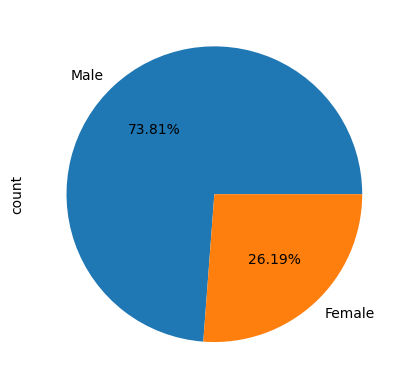

In [18]:

data = pd.read_csv('/content/Liver Patient Dataset (LPD)_train.csv', encoding='latin1')# Check if 'Gender of the patient' column exists before attempting to plot
if "Gender of the patient" in data.columns:
    data["Gender of the patient"].value_counts().plot(kind="pie", autopct="%.2f%%")
else:
    print("Column 'Gender_of_the_patient' not found in the DataFrame.")

In [19]:
data.columns = [col.strip().replace(" ", "_") for col in data.columns]


In [20]:
# Verify column names
print(data.columns)

# Replacing null values of quantitative features with their mean
quantitative_features = [
    'Age_of_the_patient', 'Total_Bilirubin', 'Direct_Bilirubin',
    'Sgot_Aspartate_Aminotransferase', 'Total_Protiens',
    'A/G_Ratio_Albumin_and_Globulin_Ratio'
]

for feature in quantitative_features:
    if feature in data.columns:
        data[feature] = data[feature].fillna(data[feature].mean())
    else:
        print(f"Feature '{feature}' not found in the dataset!")


Index(['Age_of_the_patient', 'Gender_of_the_patient', 'Total_Bilirubin',
       'Direct_Bilirubin', 'Alkphos_Alkaline_Phosphotase',
       'Sgpt_Alamine_Aminotransferase', 'Sgot_Aspartate_Aminotransferase',
       'Total_Protiens', 'ALB_Albumin', 'A/G_Ratio_Albumin_and_Globulin_Ratio',
       'Result'],
      dtype='object')


In [21]:
# Calculate the sum of missing values for each column
missing_values = data.isnull().sum()

# Display the missing values for each column
print("Missing values per column:")
print(missing_values)


Missing values per column:
Age_of_the_patient                        0
Gender_of_the_patient                   902
Total_Bilirubin                           0
Direct_Bilirubin                          0
Alkphos_Alkaline_Phosphotase            796
Sgpt_Alamine_Aminotransferase           538
Sgot_Aspartate_Aminotransferase           0
Total_Protiens                            0
ALB_Albumin                             494
A/G_Ratio_Albumin_and_Globulin_Ratio      0
Result                                    0
dtype: int64


In [22]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Replace missing values in each categorical column with its mode
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# Display the dataset after replacing nulls in categorical columns
print(data.isnull().sum())


Age_of_the_patient                        0
Gender_of_the_patient                     0
Total_Bilirubin                           0
Direct_Bilirubin                          0
Alkphos_Alkaline_Phosphotase            796
Sgpt_Alamine_Aminotransferase           538
Sgot_Aspartate_Aminotransferase           0
Total_Protiens                            0
ALB_Albumin                             494
A/G_Ratio_Albumin_and_Globulin_Ratio      0
Result                                    0
dtype: int64


In [23]:
# Fill missing values in numerical columns with their mean
data['Alkphos_Alkaline_Phosphotase'] = data['Alkphos_Alkaline_Phosphotase'].fillna(data['Alkphos_Alkaline_Phosphotase'].mean())
data['Sgpt_Alamine_Aminotransferase'] = data['Sgpt_Alamine_Aminotransferase'].fillna(data['Sgpt_Alamine_Aminotransferase'].mean())
data['ALB_Albumin'] = data['ALB_Albumin'].fillna(data['ALB_Albumin'].mean())

# Verify if there are any remaining missing values
print(data.isnull().sum())


Age_of_the_patient                      0
Gender_of_the_patient                   0
Total_Bilirubin                         0
Direct_Bilirubin                        0
Alkphos_Alkaline_Phosphotase            0
Sgpt_Alamine_Aminotransferase           0
Sgot_Aspartate_Aminotransferase         0
Total_Protiens                          0
ALB_Albumin                             0
A/G_Ratio_Albumin_and_Globulin_Ratio    0
Result                                  0
dtype: int64


In [24]:
# List of quantitative columns
quantitative_columns = [
    'Age_of_the_patient',
    'Total_Bilirubin',
    'Direct_Bilirubin',
    'Alkphos_Alkaline_Phosphotase',
    'Sgpt_Alamine_Aminotransferase',
    'Sgot_Aspartate_Aminotransferase',
    'Total_Protiens',
    'ALB_Albumin',
    'A/G_Ratio_Albumin_and_Globulin_Ratio'
]

# Checking for negative values in quantitative columns
for column in quantitative_columns:
    if (data[column] < 0).any():
        print(f"{column} column has negative values.\n")
    else:
        print(f"{column} column does not have negative values.\n")


Age_of_the_patient column does not have negative values.

Total_Bilirubin column does not have negative values.

Direct_Bilirubin column does not have negative values.

Alkphos_Alkaline_Phosphotase column does not have negative values.

Sgpt_Alamine_Aminotransferase column does not have negative values.

Sgot_Aspartate_Aminotransferase column does not have negative values.

Total_Protiens column does not have negative values.

ALB_Albumin column does not have negative values.

A/G_Ratio_Albumin_and_Globulin_Ratio column does not have negative values.



In [50]:
# Display the column names in your dataset
print(data.columns)
#target = "Outcome"  # Replace with the actual target column name


Index(['Age_of_the_patient', 'Gender_of_the_patient', 'Total_Bilirubin',
       'Direct_Bilirubin', 'Alkphos_Alkaline_Phosphotase',
       'Sgpt_Alamine_Aminotransferase', 'Sgot_Aspartate_Aminotransferase',
       'Total_Protiens', 'ALB_Albumin', 'A/G_Ratio_Albumin_and_Globulin_Ratio',
       'Result'],
      dtype='object')


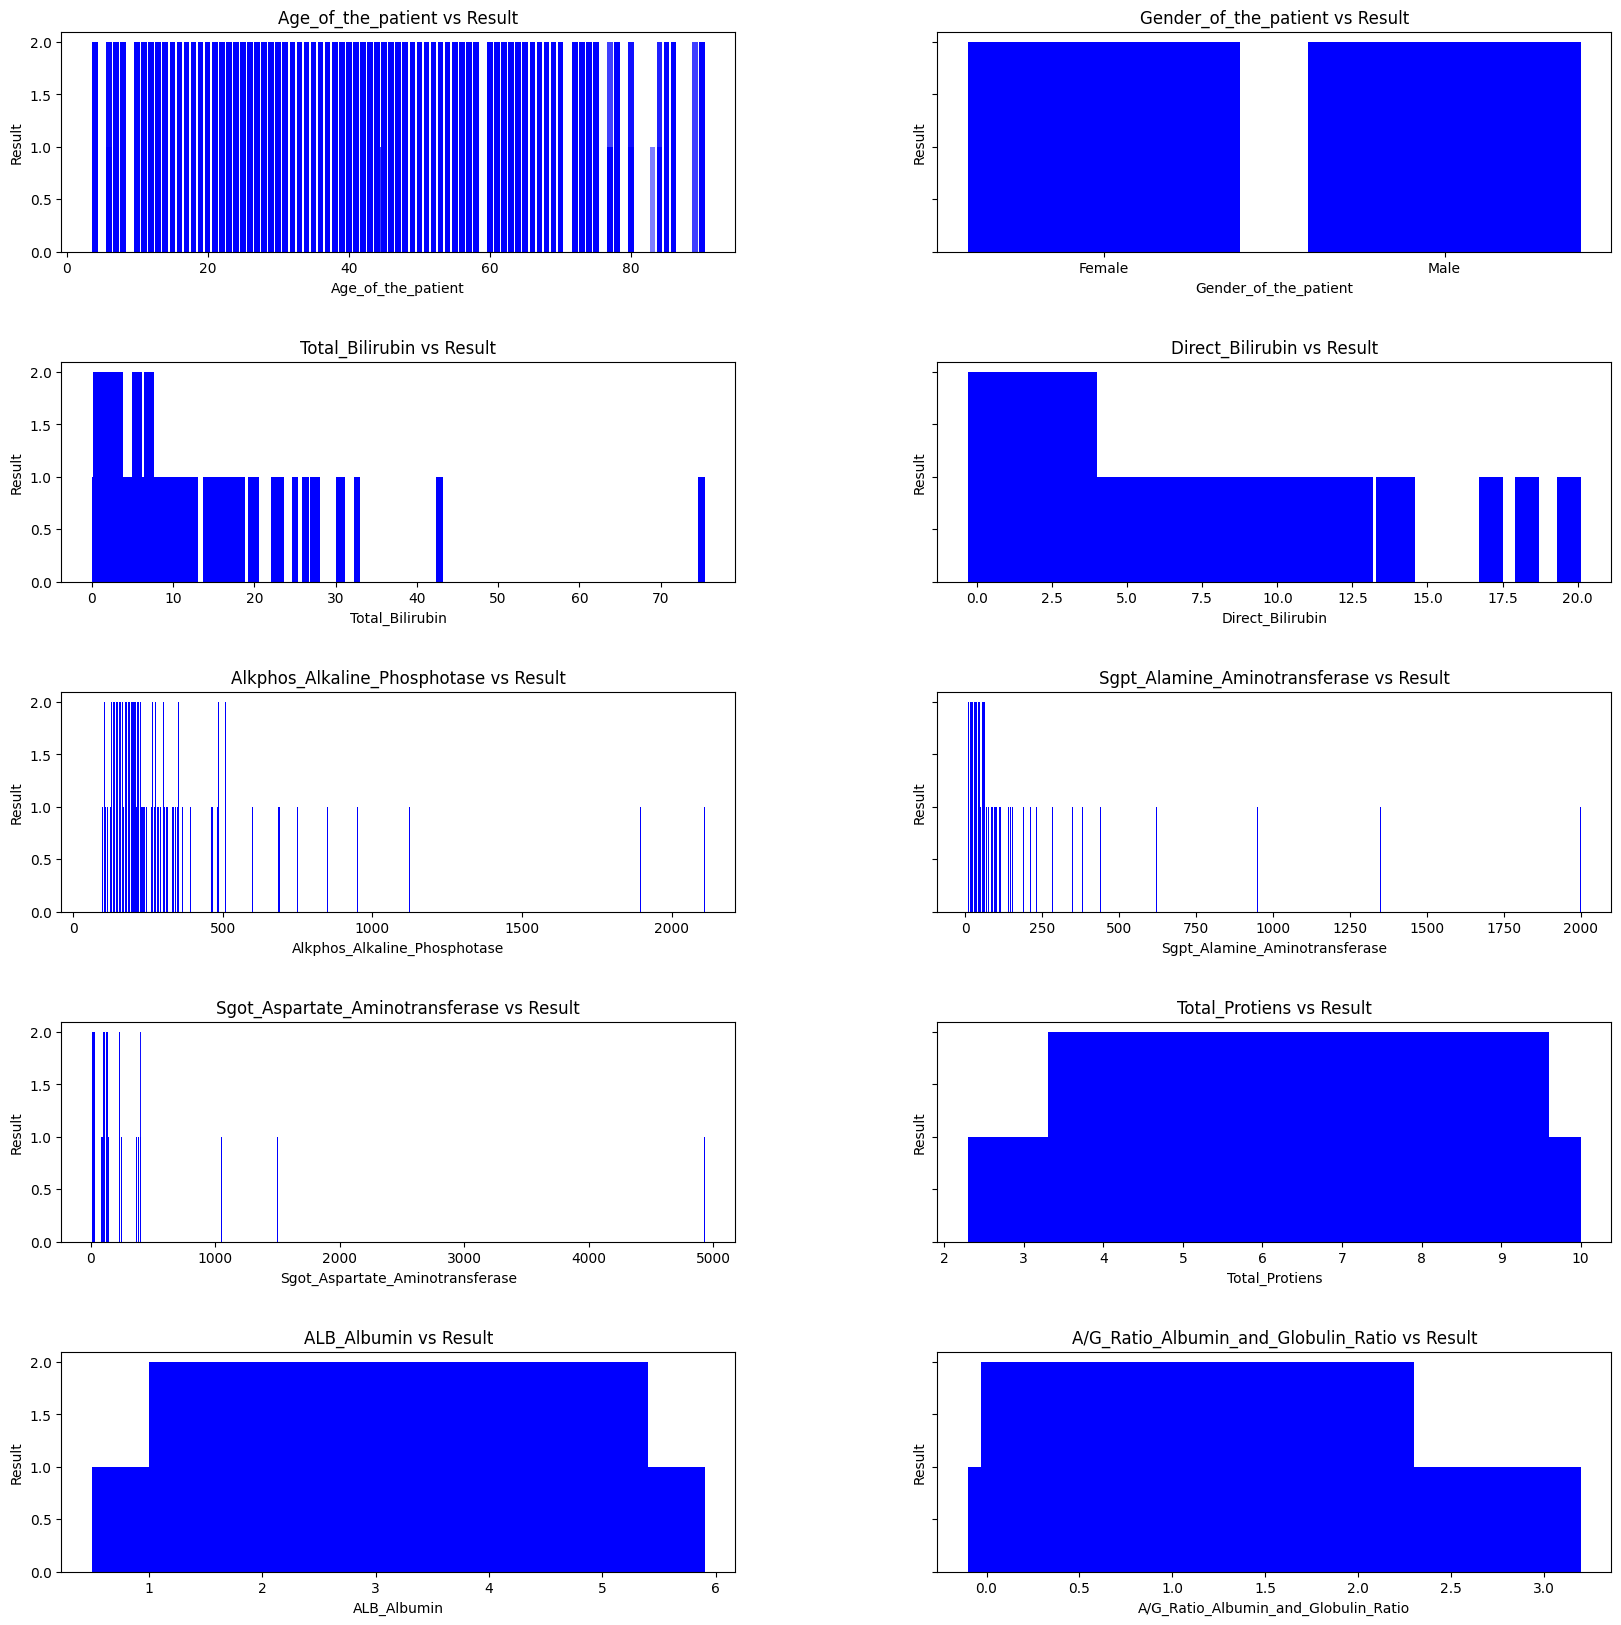

In [26]:
# Define the correct target column
target = "Result"  # Assuming 'Result' is your target column

# Define the columns to plot (excluding the target column)
columns_to_plot = list(range(data.shape[1] - 1))  # All columns except the last one ('Result')

# Create subplots
figure, axs = plt.subplots(len(columns_to_plot) // 2 + len(columns_to_plot) % 2,
                            2, figsize=(20, len(columns_to_plot) * 2), sharey=True, squeeze=True)

# Plot each column against the target
for i, column in enumerate(columns_to_plot):
    axs[i // 2, i % 2].bar(data.iloc[:, column], data[target], color='Blue', alpha=0.5)
    axs[i // 2, i % 2].set_xlabel(data.columns[column])
    axs[i // 2, i % 2].set_ylabel(target)
    axs[i // 2, i % 2].set_title(f'{data.columns[column]} vs {target}')

# Adjust layout
figure.subplots_adjust(wspace=0.3, hspace=0.5)

# Show plots
plt.show()


In [27]:
# Compare the null values in pre-processed and unprocessed datasets
NULL_values_comparison = pd.concat(
    [data2.isnull().sum(), data.isnull().sum()], axis=1
)

# Rename columns for clarity
NULL_values_comparison.columns = ['NULL_Values_Unprocessed', 'NULL_Values_Processed']

# Print the comparison
print(NULL_values_comparison)


                                      NULL_Values_Unprocessed  \
Age of the patient                                        2.0   
Gender of the patient                                   902.0   
Total Bilirubin                                         648.0   
Direct Bilirubin                                        561.0   
 Alkphos Alkaline Phosphotase                           796.0   
 Sgpt Alamine Aminotransferase                          538.0   
Sgot Aspartate Aminotransferase                         462.0   
Total Protiens                                          463.0   
 ALB Albumin                                            494.0   
A/G Ratio Albumin and Globulin Ratio                    559.0   
Result                                                    0.0   
Age_of_the_patient                                        NaN   
Gender_of_the_patient                                     NaN   
Total_Bilirubin                                           NaN   
Direct_Bilirubin         

In [28]:
# Display data types of all columns
print(data.dtypes)

# Identify categorical features (columns with dtype 'object')
categorical_features = data.select_dtypes(include=['object']).columns

# Print the categorical features
print("Categorical Features:")
print(categorical_features)


Age_of_the_patient                      float64
Gender_of_the_patient                    object
Total_Bilirubin                         float64
Direct_Bilirubin                        float64
Alkphos_Alkaline_Phosphotase            float64
Sgpt_Alamine_Aminotransferase           float64
Sgot_Aspartate_Aminotransferase         float64
Total_Protiens                          float64
ALB_Albumin                             float64
A/G_Ratio_Albumin_and_Globulin_Ratio    float64
Result                                    int64
dtype: object
Categorical Features:
Index(['Gender_of_the_patient'], dtype='object')


In [29]:
# Identify categorical features
categorical_features = data.select_dtypes(include=['object']).columns

# Print unique values for each categorical feature
for feature in categorical_features:
    print(f"{feature} categorical features Value:")
    print(data[feature].unique())
    print("----------------------------------------------------------------------------")


Gender_of_the_patient categorical features Value:
['Female' 'Male']
----------------------------------------------------------------------------


In [30]:
for feature in categorical_features:
    print(f"{feature}: {data[feature].nunique()} unique values")


Gender_of_the_patient: 2 unique values


In [31]:
# Specify the categorical column for one-hot encoding
categorical_cols = ['Gender_of_the_patient']

# Perform one-hot encoding on the specified categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, dtype=int)

# Display the first few rows of the encoded dataset
print(data_encoded.head())


   Age_of_the_patient  Total_Bilirubin  Direct_Bilirubin  \
0                65.0              0.7               0.1   
1                62.0             10.9               5.5   
2                62.0              7.3               4.1   
3                58.0              1.0               0.4   
4                72.0              3.9               2.0   

   Alkphos_Alkaline_Phosphotase  Sgpt_Alamine_Aminotransferase  \
0                         187.0                           16.0   
1                         699.0                           64.0   
2                         490.0                           60.0   
3                         182.0                           14.0   
4                         195.0                           27.0   

   Sgot_Aspartate_Aminotransferase  Total_Protiens  ALB_Albumin  \
0                             18.0             6.8          3.3   
1                            100.0             7.5          3.2   
2                             68.0       

In [32]:
# Display information about the dataset after one-hot encoding
data_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age_of_the_patient                    30691 non-null  float64
 1   Total_Bilirubin                       30691 non-null  float64
 2   Direct_Bilirubin                      30691 non-null  float64
 3   Alkphos_Alkaline_Phosphotase          30691 non-null  float64
 4   Sgpt_Alamine_Aminotransferase         30691 non-null  float64
 5   Sgot_Aspartate_Aminotransferase       30691 non-null  float64
 6   Total_Protiens                        30691 non-null  float64
 7   ALB_Albumin                           30691 non-null  float64
 8   A/G_Ratio_Albumin_and_Globulin_Ratio  30691 non-null  float64
 9   Result                                30691 non-null  int64  
 10  Gender_of_the_patient_Female          30691 non-null  int64  
 11  Gender_of_the_p

In [33]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Initialize the StandardScaler
scaler = StandardScaler()

# Define batch size
batch_size = 500

# Apply partial fitting to the scaler in batches
for i in range(0, len(data_encoded), batch_size):
    scaler.partial_fit(data_encoded.iloc[i:i+batch_size])

# Transform the dataset using the fitted scaler
X_scaled = scaler.transform(data_encoded)

# Display the transformed data (standardized)
print("Standardized Data:")
print(X_scaled)

# Verify the shape to ensure successful scaling
print(f"Shape of X_scaled: {X_scaled.shape}")


Standardized Data:
[[ 1.30741255 -0.43146015 -0.50226621 ... -0.63271519  1.71266775
  -1.71266775]
 [ 1.11968096  1.21661755  1.39700416 ... -0.63271519 -0.58388441
   0.58388441]
 [ 1.11968096  0.63494307  0.90460073 ... -0.63271519 -0.58388441
   0.58388441]
 ...
 [ 0.6190634   0.55415494  0.51771232 ... -0.63271519 -0.58388441
   0.58388441]
 [ 0.24360022 -0.23756866 -0.18572114 ... -0.63271519  1.71266775
  -1.71266775]
 [-0.8827893  -0.04367716  0.0253089  ... -0.63271519 -0.58388441
   0.58388441]]
Shape of X_scaled: (30691, 12)


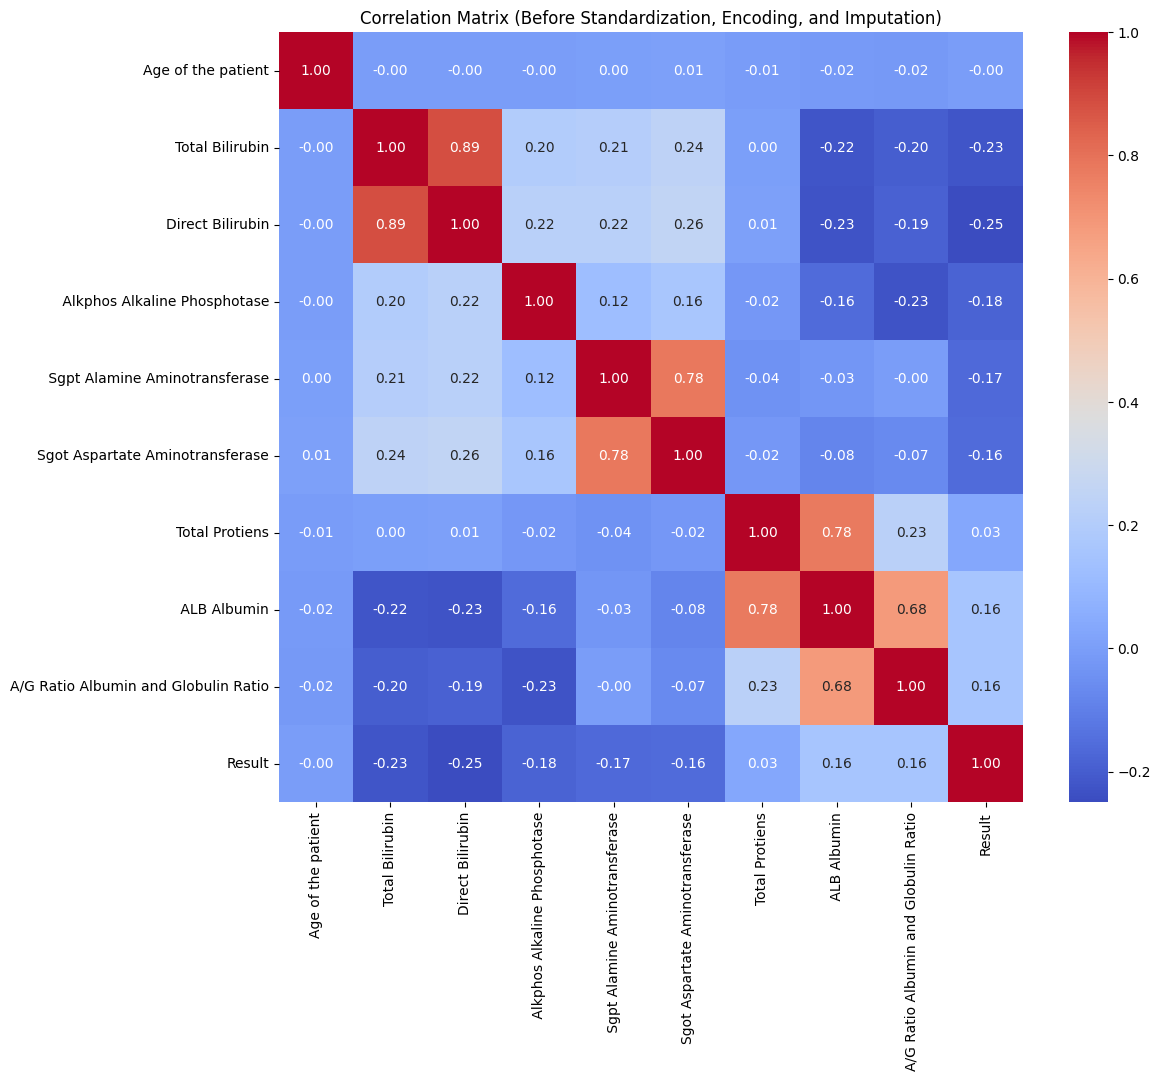

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the standardized data back into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=data_encoded.columns)

# Extract numeric columns from the original (unprocessed) dataset
numeric_columns = data2.select_dtypes(include=['int64', 'float64']).columns
housing_numeric = data2[numeric_columns]

# Calculate the correlation matrix before preprocessing
corr_before = housing_numeric.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_before, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Before Standardization, Encoding, and Imputation)')
plt.show()


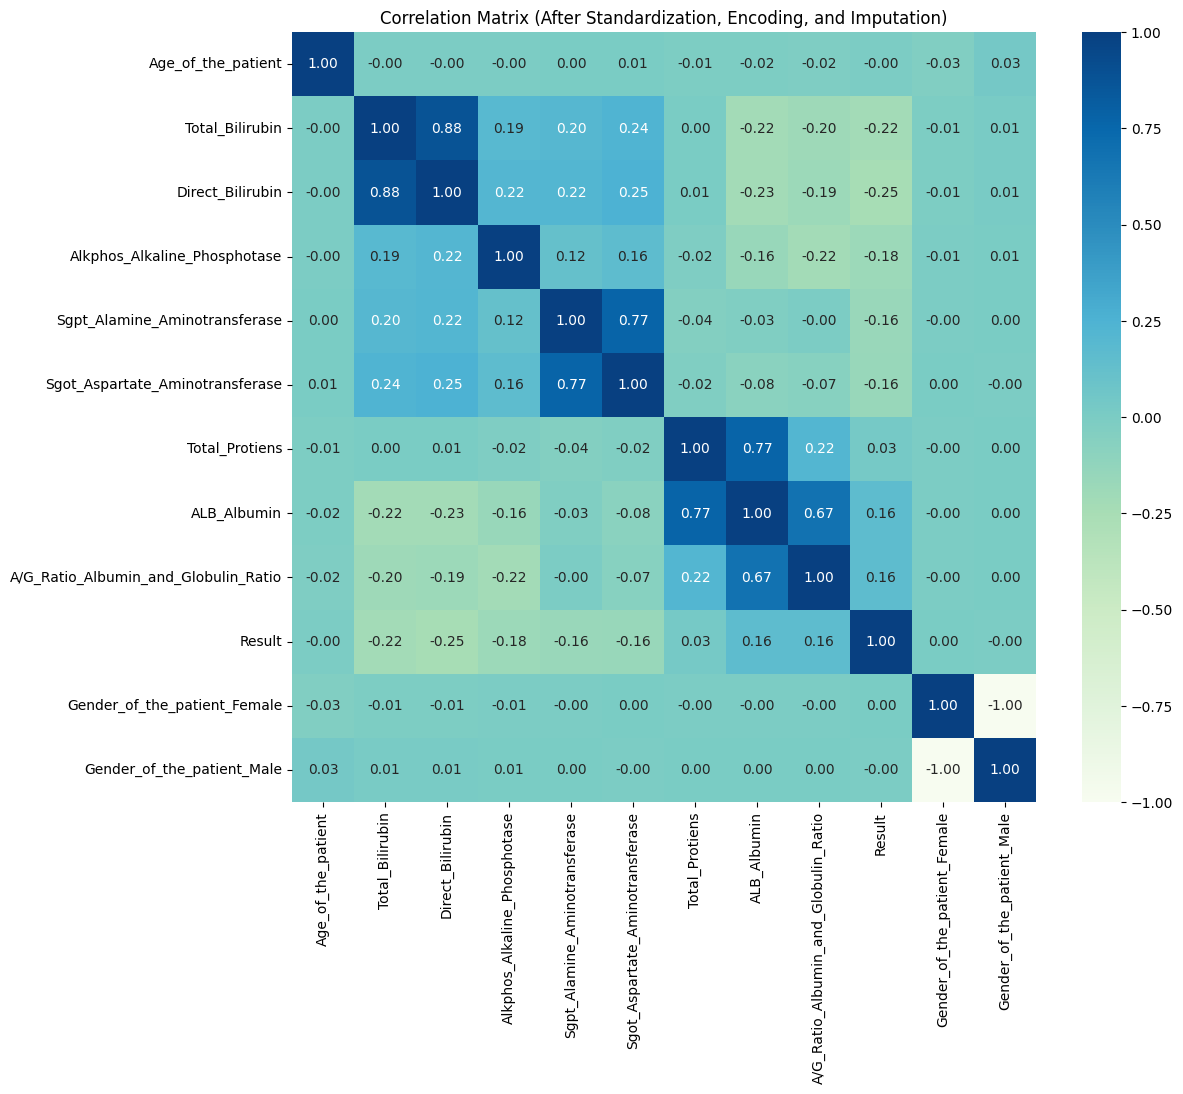

In [35]:
# Convert the standardized array into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=data_encoded.columns)

# Calculate the correlation matrix after preprocessing
corr_after = X_scaled_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_after, cmap='GnBu', annot=True, fmt=".2f")
plt.title('Correlation Matrix (After Standardization, Encoding, and Imputation)')
plt.show()


In [36]:
print(data_encoded.columns)


Index(['Age_of_the_patient', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkphos_Alkaline_Phosphotase', 'Sgpt_Alamine_Aminotransferase',
       'Sgot_Aspartate_Aminotransferase', 'Total_Protiens', 'ALB_Albumin',
       'A/G_Ratio_Albumin_and_Globulin_Ratio', 'Result',
       'Gender_of_the_patient_Female', 'Gender_of_the_patient_Male'],
      dtype='object')


In [37]:
# Check the column names in the data_encoded DataFrame to locate the target variable
data_encoded_columns = data_encoded.columns
data_encoded_columns


Index(['Age_of_the_patient', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkphos_Alkaline_Phosphotase', 'Sgpt_Alamine_Aminotransferase',
       'Sgot_Aspartate_Aminotransferase', 'Total_Protiens', 'ALB_Albumin',
       'A/G_Ratio_Albumin_and_Globulin_Ratio', 'Result',
       'Gender_of_the_patient_Female', 'Gender_of_the_patient_Male'],
      dtype='object')

In [52]:
from sklearn.model_selection import train_test_split

# Splitting dataset into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1337)

# Calculate percentages
train_percentage = len(X_train) / len(X) * 100
test_percentage = len(X_test) / len(X) * 100

# Display results
print(f"Training Set: {len(X_train)} rows ({train_percentage:.2f}%)")
print(f"Test Set: {len(X_test)} rows ({test_percentage:.2f}%)")


Training Set: 21483 rows (70.00%)
Test Set: 9208 rows (30.00%)


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def get_train_test_split(data, target_column, test_size=0.2, random_state=1337):
    """
    Splits the data into training and test sets after one-hot encoding and scaling

    Args:
      data (pd.DataFrame): Input dataframe
      target_column (str): name of the target column
      test_size (float): percentage of data to use for test
      random_state(int): random seed for reproducibility

    Returns:
       X_train, X_test, y_train, y_test (tuple): training and testing splits
    """

    # Perform one-hot encoding
    categorical_cols = ['Gender_of_the_patient']
    data_encoded = pd.get_dummies(data, columns=categorical_cols, dtype=int)


    # Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(data_encoded.drop(columns=[target_column]))

    # Prepare X and y
    X = X_scaled
    y = data_encoded[target_column]

    # Perform the train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Load the dataset
data = pd.read_csv('/content/Liver Patient Dataset (LPD)_train.csv', encoding='latin1')
data.columns = [col.strip().replace(" ", "_") for col in data.columns]

# Replacing null values of quantitative features with their mean
quantitative_features = [
    'Age_of_the_patient', 'Total_Bilirubin', 'Direct_Bilirubin',
    'Sgot_Aspartate_Aminotransferase', 'Total_Protiens',
    'A/G_Ratio_Albumin_and_Globulin_Ratio'
]

for feature in quantitative_features:
        data[feature] = data[feature].fillna(data[feature].mean())

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Replace missing values in each categorical column with its mode
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# Fill missing values in numerical columns with their mean
data['Alkphos_Alkaline_Phosphotase'] = data['Alkphos_Alkaline_Phosphotase'].fillna(data['Alkphos_Alkaline_Phosphotase'].mean())
data['Sgpt_Alamine_Aminotransferase'] = data['Sgpt_Alamine_Aminotransferase'].fillna(data['Sgpt_Alamine_Aminotransferase'].mean())
data['ALB_Albumin'] = data['ALB_Albumin'].fillna(data['ALB_Albumin'].mean())

# Define the target variable
target = "Result"
X_train, X_test, y_train, y_test = get_train_test_split(data, target)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)

# Decision Tree Classifier (DT)
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

# Random Forest (RF)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

K-Nearest Neighbors Accuracy: 0.9161101156540153
Decision Tree Accuracy: 0.9915295650757452
Random Forest Accuracy: 0.9972308193516859


In [40]:
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)

K-Nearest Neighbors Accuracy: 0.9161101156540153


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Decision Tree Classifier (DT)
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.9908779931584949


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Random Forest (RF)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9977194982896237


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Convert predictions to discrete categories (e.g., round to nearest integer if the target is categorical)
lr_predictions_rounded = np.round(lr_predictions)

# Calculate accuracy
accuracy = accuracy_score(y_test, lr_predictions_rounded)

# Evaluate regression metrics
mse = mean_squared_error(y_test, lr_predictions)
r2 = r2_score(y_test, lr_predictions)

print("Linear Regression Accuracy (approximated):", accuracy)
print("Linear Regression Mean Squared Error:", mse)
print("Linear Regression R-squared Score:", r2)


Linear Regression Accuracy (approximated): 0.7137970353477765
Linear Regression Mean Squared Error: 0.18247635373520738
Linear Regression R-squared Score: 0.10216352526546413


In [44]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# # Initialize models
# models = {
#     "K-Nearest Neighbors": KNeighborsClassifier(),
#     "Decision Tree": DecisionTreeClassifier(random_state=42),
#     "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
# }

# # Train and evaluate classification models
# for model_name, model in models.items():
#     print(f"\nTraining and Testing: {model_name}")

#     # Train the model
#     model.fit(X_train, y_train)

#     # Make predictions
#     y_pred = model.predict(X_test)

#     # Evaluate the model
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"Accuracy: {accuracy:.2f}")
#     print("Classification Report:")
#     print(classification_report(y_test, y_pred))

#     # Confusion Matrix
#     cm = confusion_matrix(y_test, y_pred)
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
#     plt.title(f"Confusion Matrix for {model_name}")
#     plt.xlabel("Predicted")
#     plt.ylabel("Actual")
#     plt.show()

# # Linear Regression
# print("\nTraining and Testing: Linear Regression")
# lr_model = LinearRegression()
# lr_model.fit(X_train, y_train)

# # Make predictions
# lr_predictions = lr_model.predict(X_test)

# # Round predictions to nearest integer for classification-like evaluation
# lr_predictions_rounded = np.round(lr_predictions)

# # Evaluate the model
# lr_accuracy = accuracy_score(y_test, lr_predictions_rounded)
# print(f"Accuracy: {lr_accuracy:.2f}")
# print("Classification Report:")
# print(classification_report(y_test, lr_predictions_rounded))

# # Confusion Matrix for Linear Regression
# lr_cm = confusion_matrix(y_test, lr_predictions_rounded)
# plt.figure(figsize=(8, 6))
# sns.heatmap(lr_cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
# plt.title("Confusion Matrix for Linear Regression")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()


In [45]:
# # Linear Regression
# print("\nTraining and Testing: Linear Regression")
# lr_model = LinearRegression()
# lr_model.fit(X_train, y_train)

# # Make predictions
# lr_predictions = lr_model.predict(X_test)

# # Convert predictions to discrete categories by rounding to nearest integer
# # Ensure the predictions are integers matching the unique values of the target variable
# lr_predictions_rounded = np.clip(np.round(lr_predictions), a_min=min(y_test), a_max=max(y_test)).astype(int)

# # Evaluate the model
# lr_accuracy = accuracy_score(y_test, lr_predictions_rounded)
# print(f"Accuracy: {lr_accuracy:.2f}")
# print("Classification Report:")
# print(classification_report(y_test, lr_predictions_rounded))

# # Confusion Matrix for Linear Regression
# lr_cm = confusion_matrix(y_test, lr_predictions_rounded)
# plt.figure(figsize=(8, 6))
# sns.heatmap(lr_cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
# plt.title("Confusion Matrix for Linear Regression")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()



Training and Testing: K-Nearest Neighbors
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.95      0.94      4397
           2       0.86      0.84      0.85      1742

    accuracy                           0.92      6139
   macro avg       0.90      0.89      0.90      6139
weighted avg       0.92      0.92      0.92      6139



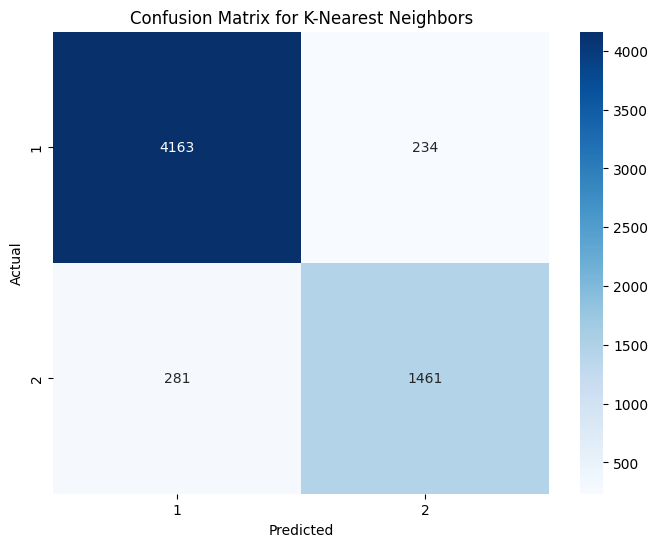


Training and Testing: Decision Tree
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      4397
           2       0.98      0.99      0.98      1742

    accuracy                           0.99      6139
   macro avg       0.99      0.99      0.99      6139
weighted avg       0.99      0.99      0.99      6139



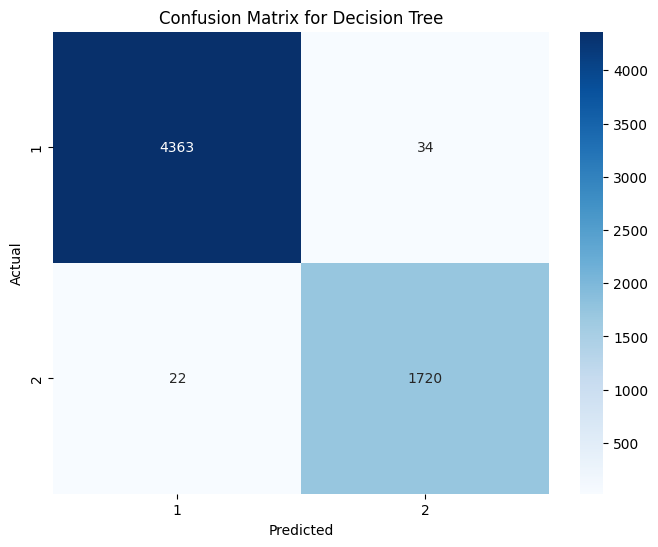


Training and Testing: Logistic Regression
Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.94      0.83      4397
           2       0.57      0.19      0.29      1742

    accuracy                           0.73      6139
   macro avg       0.66      0.57      0.56      6139
weighted avg       0.70      0.73      0.68      6139



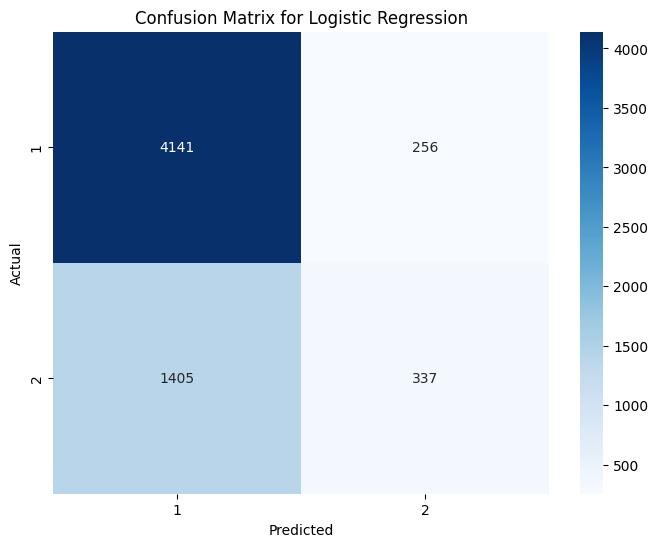


Training and Testing: Linear Regression
Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

           1       0.72      1.00      0.83      4397
           2       0.11      0.00      0.00      1742

    accuracy                           0.72      6139
   macro avg       0.41      0.50      0.42      6139
weighted avg       0.54      0.72      0.60      6139



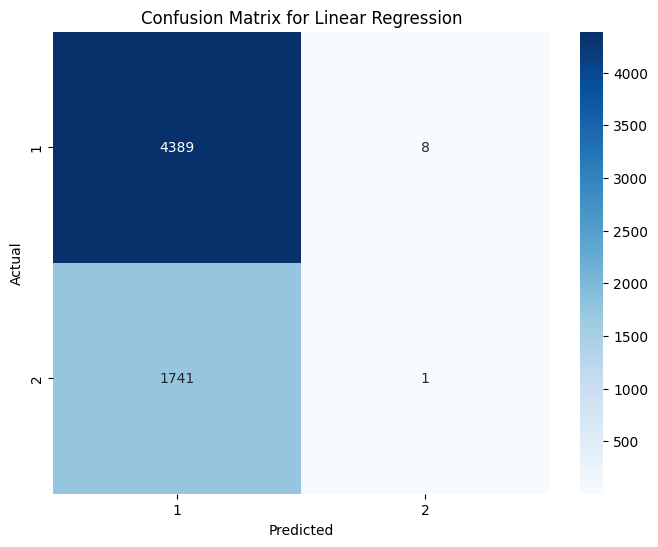

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize models
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
}

# Train and evaluate classification models
for model_name, model in models.items():
    print(f"\nTraining and Testing: {model_name}")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Linear Regression
print("\nTraining and Testing: Linear Regression")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test)

# Convert predictions to discrete categories by rounding to nearest integer
# Ensure the predictions are integers matching the unique values of the target variable
lr_predictions_rounded = np.clip(np.round(lr_predictions), a_min=min(y_test), a_max=max(y_test)).astype(int)

# Evaluate the model
lr_accuracy = accuracy_score(y_test, lr_predictions_rounded)
print(f"Accuracy: {lr_accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, lr_predictions_rounded))

# Confusion Matrix for Linear Regression
lr_cm = confusion_matrix(y_test, lr_predictions_rounded)
plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix for Linear Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Training and Testing: Logistic Regression
Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.94      0.83      4397
           2       0.57      0.19      0.29      1742

    accuracy                           0.73      6139
   macro avg       0.66      0.57      0.56      6139
weighted avg       0.70      0.73      0.68      6139



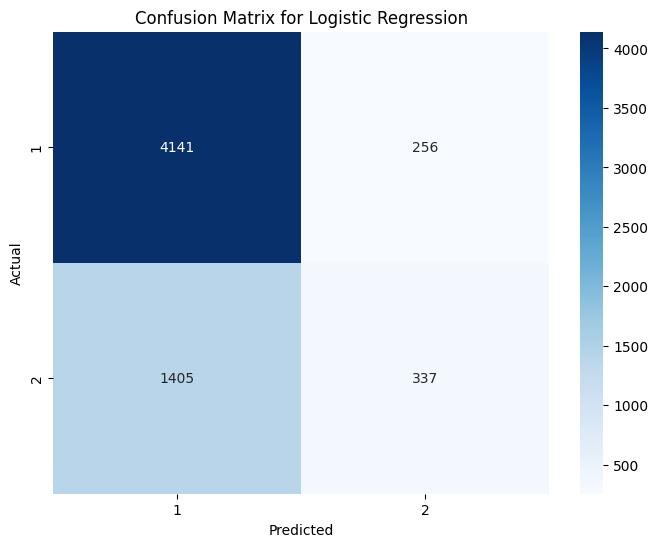

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression Model
print("\nTraining and Testing: Logistic Regression")

# Initialize and train the model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
print(f"Accuracy: {logistic_accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic))

# Confusion Matrix
logistic_cm = confusion_matrix(y_test, y_pred_logistic)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(logistic_cm, annot=True, fmt="d", cmap="Blues", xticklabels=logistic_model.classes_, yticklabels=logistic_model.classes_)
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Training and Testing: Logistic Regression
Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.94      0.83      4397
           2       0.57      0.19      0.29      1742

    accuracy                           0.73      6139
   macro avg       0.66      0.57      0.56      6139
weighted avg       0.70      0.73      0.68      6139



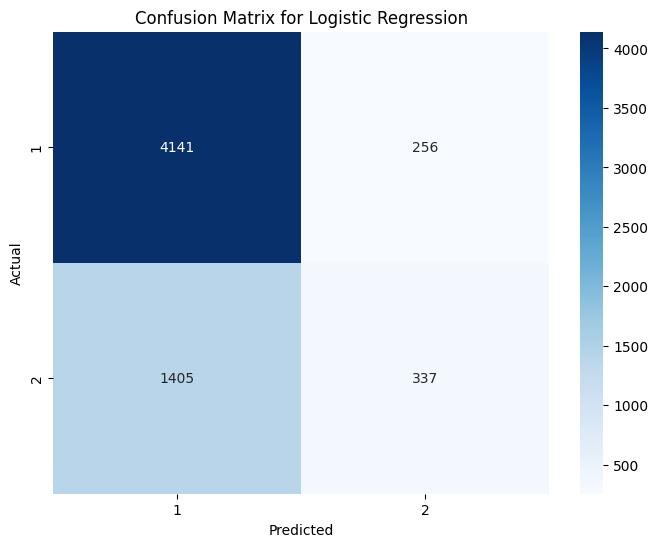

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np


def get_train_test_split(data, target_column, test_size=0.2, random_state=1337):
    """
    Splits the data into training and test sets after one-hot encoding and scaling

    Args:
      data (pd.DataFrame): Input dataframe
      target_column (str): name of the target column
      test_size (float): percentage of data to use for test
      random_state(int): random seed for reproducibility

    Returns:
       X_train, X_test, y_train, y_test (tuple): training and testing splits
    """

    # Perform one-hot encoding
    categorical_cols = ['Gender_of_the_patient']
    data_encoded = pd.get_dummies(data, columns=categorical_cols, dtype=int)


    # Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(data_encoded.drop(columns=[target_column]))

    # Prepare X and y
    X = X_scaled
    y = data_encoded[target_column]

    # Perform the train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Load the dataset
data = pd.read_csv('/content/Liver Patient Dataset (LPD)_train.csv', encoding='latin1')
data.columns = [col.strip().replace(" ", "_") for col in data.columns]

# Replacing null values of quantitative features with their mean
quantitative_features = [
    'Age_of_the_patient', 'Total_Bilirubin', 'Direct_Bilirubin',
    'Sgot_Aspartate_Aminotransferase', 'Total_Protiens',
    'A/G_Ratio_Albumin_and_Globulin_Ratio'
]

for feature in quantitative_features:
        data[feature] = data[feature].fillna(data[feature].mean())

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Replace missing values in each categorical column with its mode
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# Fill missing values in numerical columns with their mean
data['Alkphos_Alkaline_Phosphotase'] = data['Alkphos_Alkaline_Phosphotase'].fillna(data['Alkphos_Alkaline_Phosphotase'].mean())
data['Sgpt_Alamine_Aminotransferase'] = data['Sgpt_Alamine_Aminotransferase'].fillna(data['Sgpt_Alamine_Aminotransferase'].mean())
data['ALB_Albumin'] = data['ALB_Albumin'].fillna(data['ALB_Albumin'].mean())


# Define the target variable
target = "Result"
X_train, X_test, y_train, y_test = get_train_test_split(data, target)


# Logistic Regression Model
print("\nTraining and Testing: Logistic Regression")

# Initialize and train the model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
print(f"Accuracy: {logistic_accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic))

# Confusion Matrix
logistic_cm = confusion_matrix(y_test, y_pred_logistic)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(logistic_cm, annot=True, fmt="d", cmap="Blues", xticklabels=logistic_model.classes_, yticklabels=logistic_model.classes_)
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Training and Testing: Naive Bayes
Accuracy: 0.56
Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.40      0.56      4397
           2       0.39      0.96      0.55      1742

    accuracy                           0.56      6139
   macro avg       0.67      0.68      0.56      6139
weighted avg       0.80      0.56      0.56      6139



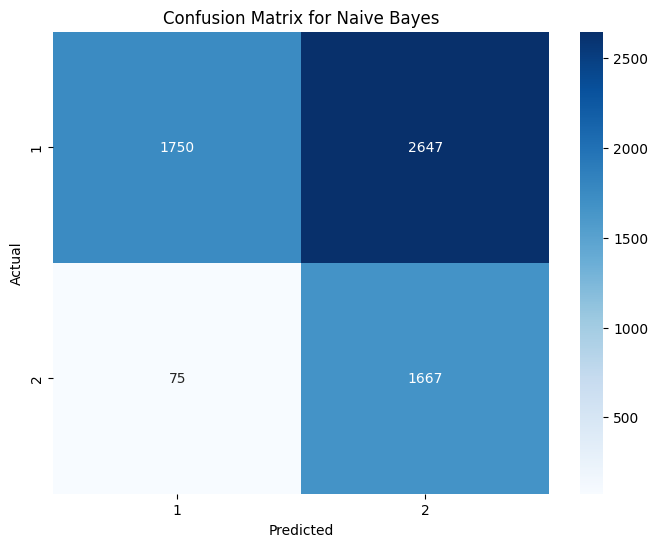

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Naive Bayes Model
print("\nTraining and Testing: Naive Bayes")

# Initialize and train the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy: {nb_accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

# Confusion Matrix
nb_cm = confusion_matrix(y_test, y_pred_nb)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix for Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
